# Week 11 Assignment - Custom Functions and Plotting

Write a function that will read in this week's county-level covid data ("covidData_4.7.20.csv") and create a line plot showing increases in cumulative case counts or deaths through time for  a particular state. The line plot should have labeled axes and a grid.

The function should accept two arguments. The first argument should be the name of the state. The second should indicate whether the user wants to plot case counts or deaths (defaulting to case counts). You will need to write a second function that calculates the case counts per state per day, summing across counties/parishes.

As always, remember to document your code, including docstrings for functions.

NOTE 1: One thing that tripped me up initially - not all counties/parishes have fips codes in this dataset. So that field may be empty for some lines in the file.

NOTE 2: Remember that when you first read from a file, everything is considered a string. To get proper plots, you'll need to convert numbers stored as strings to actual numbers.

In [9]:
# Import needed modules here

import matplotlib.pyplot as plt
import numpy as np
import copy
import re

In [10]:
# Your code here...

def dailyStateSum(currentDate, stateName, dataType):
    """Find the daily number of cases or deaths per state when provided with
    date, state, and data type; dataType: 0 = cases, 1 = deaths"""
    
    inDataFile = open("../covidData_4.7.20.csv",'r')
    inData = inDataFile.read()
    inDataFile.close()

    # Enter currentDate and stateName into variable for regex
    argInfo = currentDate + r",.+," + stateName + r".+"

    # Get all lines for stateName on currentDate
    matchList = re.findall(argInfo, inData)

    # Start sum at 0
    sum = 0

    # Going through data on currentDate in stateName
    for match in matchList:
        # Pull out number of cases and deaths
        dailyCombined = re.search(r"\d+,\d+$",match).group()

        # Get Cases: dataType = 0
        if dataType == 0:
            # Get first number from combined string, and add it to sum
            dailyCases = re.search(r"^\d+",dailyCombined).group()
            sum = sum + int(dailyCases)

        # Get Deaths: dataType = 1
        if dataType == 1:
            # Get last number from combined string, and add it to sum
            dailyDeaths = re.search(r"\d+$",dailyCombined).group()
            sum = sum + int(dailyDeaths)

    return sum


def plotState(givenState, givenData=0):
    """Creates a line plot with a grid based on givenState and 
    givenData for cumulative cases or deaths"""
    
    inDataFile = open("../covidData_4.7.20.csv",'r')
    inData = inDataFile.read()
    inDataFile.close()

    # Get the line that givenState appears for first time
    firstLineState = re.search(r".+,.+," + givenState + ".+",inData).group()

    # Get the date of the first appearance of state
    firstDate = firstLineState[:10]
    
    # Extract 'county,state'
    firstCounty = re.search(r"(\d+-\d+-\d+,)(.+,.+)(,.*,.*,.*)", firstLineState).group(2)
    
    # Get line of data for every time that firstCounty appears
    dateList = re.findall(r".+" + firstCounty + ".+",inData)
    
    # Create empty lists
    x = []
    y = []

    # Going through data from every day that firstCounty appears
    for i in dateList:
        # Extract date
        currentDate = i[:10]
        # Get sum for all entries for a state, and add sum to y list
        y.append(dailyStateSum(currentDate, givenState, givenData))

    # Generate evenly spaced numbers from 1 to the number of y entries for days
    # following the first case/death
    x = np.linspace(1, len(y), len(y))

    # Create plot with grid with y axis that changes according to dataType
    if givenData == 0:
        plt.ylabel("Cumulative Number of Cases in State")
    if givenData == 1:
        plt.ylabel("Cumulative Number of Deaths in State")
    plt.xlabel("Day")
    plt.grid(True,alpha=0.5)
    plt.plot(x,y)

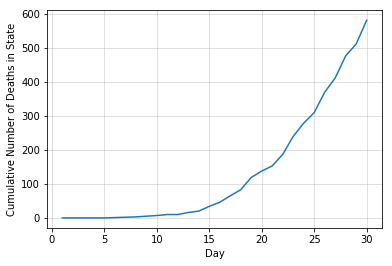

In [11]:
# Use your function to create a plot here

plotState("Louisiana", 1)


Write a second function that is similar to the first, but shows increases in cumulative case counts or deaths through time for a particular county/parish in a particular state.

The function should accept three arguments. The first argument should be the name of the county/parish. The second should be the name of the state. The third should indicate whether the user wants to plot case counts or deaths (defaulting to case counts).

As always, remember to document your code, including docstrings for functions.

In [12]:
# Your code here

def plotCounty(countyName, stateName, dataType=0):
    """Creates a line plot with a grid when given particular county, its state,
    and particular data type that shows cumulative cases/deaths; dataType: 
    0 = cases, 1 = deaths """
    
    inDataFile = open("../covidData_4.7.20.csv",'r')
    inData = inDataFile.read()
    inDataFile.close()

    # Get data for countyName
    countyMatches = re.findall(r".+," + countyName + "," + stateName + ",.+", inData)

    # Create empty lists
    x = []
    y = []

    # Go through data for countyName
    for match in countyMatches:
        # Get the number of cases and deaths in county
        dailyCounts = re.search(r"(\d+)(,)(\d+$)", match)
        # Get Cases: dataType = 0
        if dataType == 0:
            # Get the number of cases and add it to y list
            y.append(int(dailyCounts.group(1)))
        # Get Deaths: dataType = 1
        if dataType == 1:
            # Get of deaths and add it to y list
            y.append(int(dailyCounts.group(3)))

    # Generate evenly spaced numbers from 1 to the number of y entries for days
    # following the first case/death
    x = np.linspace(1, len(y), len(y))

    # Create plot with grid with y axis that changes according to dataType
    if dataType == 0:
        plt.ylabel("Cumulative Number of Cases in County")
    if dataType == 1:
        plt.ylabel("Cumulative Number of Deaths in County")
    plt.xlabel("Day")
    plt.grid(True,alpha=0.5)
    plt.plot(x,y)

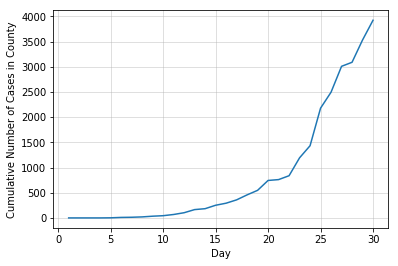

In [13]:
# Use your function to create a plot here

plotCounty("Jefferson", "Louisiana", 0)